In [1]:
!pip install geopy

In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopy
import math
from geopy import distance

In [49]:
df = pd.read_csv('uber.csv')

In [50]:
df.shape

(200000, 9)

In [51]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [52]:
df.drop(columns=['Unnamed: 0','key'],axis=1,inplace=True)

In [53]:
df.head(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1


In [54]:
# cols = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
#        'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

#another techniques to do the same
# target = 'fare_amount'
# for i in df.columns:
#     if i not in [target]:
#         print(i)
        
#using list comprehension
target = 'fare_amount'
cols = [i for i in df.columns if i not in [target]]

cols

['pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [55]:
df.shape
#200000 samples & 7 columns

(200000, 7)

In [56]:
print('Null values Percentage:')
x = pd.DataFrame(df.isnull().sum(),columns=['Total Null Values'])
x['Percentage'] = x['Total Null Values']/df.shape[0]*100
x

Null values Percentage:


,Total Null Values,Percentage
fare_amount,0,0.0000
pickup_datetime,0,0.0000
pickup_longitude,0,0.0000
pickup_latitude,0,0.0000
dropoff_longitude,1,0.0005
dropoff_latitude,1,0.0005
passenger_count,0,0.0000


Drop Null values:

In [57]:
df.dropna(inplace=True)

In [58]:
df.shape

(199999, 7)

In [59]:
df = df[(df.pickup_latitude<90) & (df.dropoff_latitude<90) &
        (df.pickup_latitude>-90) & (df.dropoff_latitude>-90) &
        (df.pickup_longitude<180) & (df.dropoff_longitude<180) &
        (df.pickup_longitude>-180) & (df.dropoff_longitude>-180)]

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199987 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199987 non-null  float64
 1   pickup_datetime    199987 non-null  object 
 2   pickup_longitude   199987 non-null  float64
 3   pickup_latitude    199987 non-null  float64
 4   dropoff_longitude  199987 non-null  float64
 5   dropoff_latitude   199987 non-null  float64
 6   passenger_count    199987 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [61]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [62]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.weekday
df['hour'] = df['pickup_datetime'].dt.hour

In [63]:
df.shape

(199987, 11)

In [64]:
df['month_quarter'] = df['month'].map({
    1:'Q1',2:'Q1',3:'Q1',
    4:'Q2',5:'Q2',6:'Q2',
    7:'Q3',8:'Q3',9:'Q3',
    10:'Q4',11:'Q4',12:'Q4'
})

df['hour_segments'] = df['hour'].map({
    0:'H1',1:'H1',2:'H1',3:'H1',
    4:'H2',5:'H2',6:'H2',7:'H2',
    8:'H3',9:'H3',10:'H3',11:'H3',
    12:'H4',13:'H4',14:'H4',15:'H4',
    16:'H5',17:'H5',18:'H5',19:'H5',
    20:'H6',21:'H6',22:'H6',23:'H6'
})

In [65]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,month_quarter,hour_segments
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Q2,H5
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Q3,H6
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Q3,H6
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Q2,H3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Q3,H5


In [66]:
df['Distance'] = [round(geopy.distance.distance((df.pickup_latitude[i],df.pickup_longitude[i]),(df.dropoff_latitude[i],df.dropoff_longitude[i])).m,2) for i in df.index]

In [67]:
df.drop(['pickup_datetime','month', 'hour',], axis=1, inplace=True)

In [68]:
original_df = df.copy(deep=True)

original_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,month_quarter,hour_segments,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,Q2,H5,1681.11
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,Q3,H6,2454.36
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,Q3,H6,5039.60
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,Q2,H3,1661.44
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,Q3,H5,4483.73


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199987 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199987 non-null  float64
 1   pickup_longitude   199987 non-null  float64
 2   pickup_latitude    199987 non-null  float64
 3   dropoff_longitude  199987 non-null  float64
 4   dropoff_latitude   199987 non-null  float64
 5   passenger_count    199987 non-null  int64  
 6   year               199987 non-null  int32  
 7   weekday            199987 non-null  int32  
 8   month_quarter      199987 non-null  object 
 9   hour_segments      199987 non-null  object 
 10  Distance           199987 non-null  float64
dtypes: float64(6), int32(2), int64(1), object(2)
memory usage: 20.8+ MB


In [70]:
df.nunique().sort_values()

month_quarter             4
hour_segments             6
year                      7
weekday                   7
passenger_count           8
fare_amount            1244
pickup_longitude      71055
dropoff_longitude     76890
pickup_latitude       83831
dropoff_latitude      90582
Distance             164542
dtype: int64

C:\Users\HP\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Distance', ylabel='Density'>

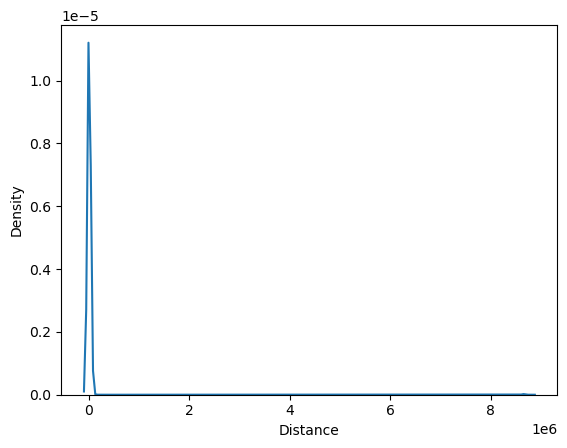

In [71]:
sns.kdeplot(df['Distance'])

In [72]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [73]:
df.drop(['pickup_latitude','pickup_longitude',
         'dropoff_latitude','dropoff_longitude'],axis=1,inplace=True)

In [74]:
print(df.shape)
df.head()

(199878, 7)


,fare_amount,passenger_count,year,weekday,month_quarter,hour_segments,Distance
0,7.5,1,2015,3,Q2,H5,1681.11
1,7.7,1,2009,4,Q3,H6,2454.36
2,12.9,1,2009,0,Q3,H6,5039.60
3,5.3,3,2009,4,Q2,H3,1661.44
4,16.0,5,2014,3,Q3,H5,4483.73


In [75]:
df['month_quarter'].nunique()

4

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199878 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      199878 non-null  float64
 1   passenger_count  199878 non-null  int64  
 2   year             199878 non-null  int32  
 3   weekday          199878 non-null  int32  
 4   month_quarter    199878 non-null  object 
 5   hour_segments    199878 non-null  object 
 6   Distance         199878 non-null  float64
dtypes: float64(2), int32(2), int64(1), object(2)
memory usage: 10.7+ MB


# Converting categorical Columns to Numeric

In [77]:
df.head(2)

,fare_amount,passenger_count,year,weekday,month_quarter,hour_segments,Distance
0,7.5,1,2015,3,Q2,H5,1681.11
1,7.7,1,2009,4,Q3,H6,2454.36


In [78]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score

In [79]:
df.head(2)

,fare_amount,passenger_count,year,weekday,month_quarter,hour_segments,Distance
0,7.5,1,2015,3,Q2,H5,1681.11
1,7.7,1,2009,4,Q3,H6,2454.36


In [81]:
# train,test,split
X = df.drop(columns=['fare_amount'])
y = df['fare_amount']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [106]:
X_test

,passenger_count,year,weekday,month_quarter,hour_segments,Distance
62086,1,2010,1,Q1,H3,1332.35
18138,1,2015,2,Q1,H4,2276.88
17408,1,2009,2,Q2,H6,9420.61
88178,2,2012,3,Q3,H5,2279.63
99261,1,2009,2,Q3,H5,1735.03
...,...,...,...,...,...,...
117519,1,2009,4,Q4,H1,1756.48
30733,1,2013,5,Q2,H3,2623.30
140625,2,2012,6,Q3,H5,2964.90
30901,1,2014,0,Q1,H1,2875.15


In [82]:
X_train

,passenger_count,year,weekday,month_quarter,hour_segments,Distance
84636,1,2011,3,Q2,H2,4562.91
85862,1,2013,3,Q2,H3,6251.23
4120,1,2009,2,Q4,H2,21220.99
136432,1,2009,2,Q2,H3,1185.13
167928,1,2010,1,Q4,H4,4803.53
...,...,...,...,...,...,...
119922,4,2011,2,Q4,H6,3172.01
103726,4,2012,5,Q1,H4,10009.90
131985,5,2013,0,Q4,H4,1041.25
146933,1,2012,4,Q2,H6,1336.75


In [107]:
ct = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse_output=False,dtype=np.int32,handle_unknown='ignore',drop='first'),['passenger_count','year','weekday','month_quarter','hour_segments']),
    ('ss',StandardScaler(),['Distance'])])

ct.set_output(transform='pandas')

ColumnTransformer(transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               dtype=<class 'numpy.int32'>,
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['passenger_count', 'year', 'weekday',
                                  'month_quarter', 'hour_segments']),
                                ('ss', StandardScaler(), ['Distance'])])

In [108]:
rfr = RandomForestRegressor(n_estimators=100,min_samples_split=5,min_samples_leaf=4,max_depth=10)

pipe = Pipeline([('ct',ct),
                ('rfr',rfr)])

In [109]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'numpy.int32'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['passenger_count', 'year',
                                                   'weekday', 'month_quarter',
                                                   'hour_segments']),
                                                 ('ss', StandardScaler(),
                                                  ['Distance'])])),
                ('rfr',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=4,
                                       min_samples_split=5))])

In [110]:
y_pred = pipe.predict(X_test)

r2_score(y_test,y_pred)

C:\Users\HP\anaconda3\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.7358648326655028

# Exporting the Model

In [111]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))